In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('creditcard_down.csv')


In [4]:
dataset.shape

(1084, 30)

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# convert shape of y_train and y_test from (n,1) to (n,)

# y_train = y_train.reshape(y_train.shape[0],1)
# y_test = y_test.reshape(y_test.shape[0],1)

y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)

print(X_train.shape);
print(y_train.shape);

print(X_train.shape);
print(y_train.shape); 




(813, 29, 1)
(813,)
(813, 29, 1)
(813,)


In [9]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Conv1D
from tensorflow.keras.models import Sequential
# import batch normalization
from tensorflow.keras.layers import BatchNormalization

# 14 Layers

In [10]:

cnn_14 = Sequential()

cnn_14.add(Conv1D(32, 2, activation = "relu", input_shape = (29,1)))
cnn_14.add(BatchNormalization())
cnn_14.add(Dropout(0.2))
cnn_14.add(Conv1D(64, 2, activation = "relu"))
cnn_14.add(BatchNormalization())
cnn_14.add(Dropout(0.5))
cnn_14.add(Conv1D(64, 2, activation = "relu"))
cnn_14.add(Flatten())
cnn_14.add(Dense(64, activation = "relu"))
cnn_14.add(Dropout(0.5))
cnn_14.add(Dense(100, activation = "relu"))
cnn_14.add(Dense(50, activation = "relu"))
cnn_14.add(Dense(25, activation = "relu"))
cnn_14.add(Dense(1, activation = "sigmoid"))

#compile Model

cnn_14.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_14.summary()

    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 28, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 27, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 27, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 27, 64)            0

In [11]:
cnn_14.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
26/26 [==============================] - 3s 22ms/step - loss: 0.5279 - accuracy: 0.6937 - val_loss: 0.5396 - val_accuracy: 0.8893
Epoch 2/10
26/26 [==============================] - 0s 9ms/step - loss: 0.2641 - accuracy: 0.9065 - val_loss: 0.4577 - val_accuracy: 0.9188
Epoch 3/10
26/26 [==============================] - 0s 10ms/step - loss: 0.2101 - accuracy: 0.9299 - val_loss: 0.3748 - val_accuracy: 0.9373
Epoch 4/10
26/26 [==============================] - 0s 9ms/step - loss: 0.1910 - accuracy: 0.9373 - val_loss: 0.3280 - val_accuracy: 0.9336
Epoch 5/10
26/26 [==============================] - 0s 9ms/step - loss: 0.1787 - accuracy: 0.9336 - val_loss: 0.2684 - val_accuracy: 0.9373
Epoch 6/10
26/26 [==============================] - 0s 10ms/step - loss: 0.1775 - accuracy: 0.9434 - val_loss: 0.2625 - val_accuracy: 0.9410
Epoch 7/10
26/26 [==============================] - 0s 10ms/step - loss: 0.1786 - accuracy: 0.9373 - val_loss: 0.2240 - val_accuracy: 0.9373
Epoch 8/10
26/26

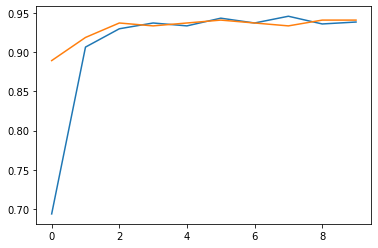

In [12]:
plt.plot(cnn_14.history.history['accuracy'], label='train acc'); 
plt.plot(cnn_14.history.history['val_accuracy'], label='val acc');  

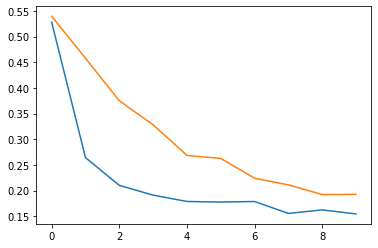

In [13]:
# print accuracy under graph;
plt.plot(cnn_14.history.history['loss'], label='train loss'); 
plt.plot(cnn_14.history.history['val_loss'], label='val loss');  

In [14]:
cnn_14.save("imbalanced/CNN_14_layers.h5")

# 17 Layers

In [15]:
cnn_17 = Sequential()
# 
cnn_17.add(Conv1D(32, 2, activation = "relu", input_shape = (29,1)))
cnn_17.add(BatchNormalization())
cnn_17.add(Dropout(0.2))

cnn_17.add(Conv1D(64, 2, activation = "relu"))
cnn_17.add(BatchNormalization())
cnn_17.add(Dropout(0.5))

cnn_17.add(Conv1D(64, 2, activation = "relu"))
cnn_17.add(BatchNormalization())
cnn_17.add(Dropout(0.25))

cnn_17.add(Flatten())

cnn_17.add(Dense(64, activation = "relu"))

cnn_17.add(Dropout(0.5))

cnn_17.add(Dense(100, activation = "relu"))

cnn_17.add(Dense(50, activation = "relu"))

cnn_17.add(Dense(25, activation = "relu"))

cnn_17.add(Dense(1, activation = "sigmoid"))

cnn_17.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_17.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 28, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 28, 32)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 27, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 27, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 27, 64)           

In [16]:
cnn_17.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
26/26 [==============================] - 4s 22ms/step - loss: 0.4422 - accuracy: 0.8180 - val_loss: 0.5399 - val_accuracy: 0.8450
Epoch 2/10
26/26 [==============================] - 0s 12ms/step - loss: 0.2326 - accuracy: 0.9102 - val_loss: 0.3827 - val_accuracy: 0.9336
Epoch 3/10
26/26 [==============================] - 0s 12ms/step - loss: 0.1930 - accuracy: 0.9311 - val_loss: 0.4728 - val_accuracy: 0.6753
Epoch 4/10
26/26 [==============================] - 0s 10ms/step - loss: 0.1835 - accuracy: 0.9250 - val_loss: 0.8263 - val_accuracy: 0.4465
Epoch 5/10
26/26 [==============================] - 0s 15ms/step - loss: 0.1820 - accuracy: 0.9373 - val_loss: 0.5288 - val_accuracy: 0.5424
Epoch 6/10
26/26 [==============================] - 0s 12ms/step - loss: 0.1753 - accuracy: 0.9323 - val_loss: 0.2315 - val_accuracy: 0.9520
Epoch 7/10
26/26 [==============================] - 0s 14ms/step - loss: 0.1652 - accuracy: 0.9373 - val_loss: 0.2562 - val_accuracy: 0.9299
Epoch 8/10
26

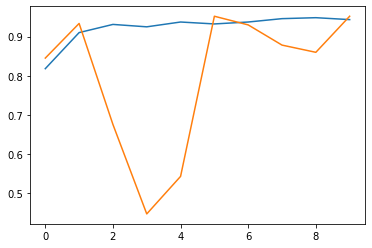

In [17]:
plt.plot(cnn_17.history.history['accuracy'], label='train acc')
plt.plot(cnn_17.history.history['val_accuracy'], label='val acc')


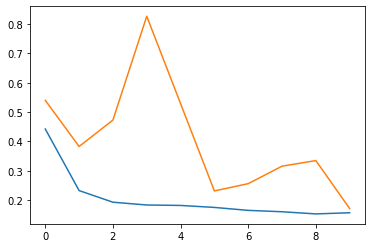

In [27]:
# print accuracy under graph;
plt.plot(cnn_17.history.history['loss'], label='train loss'); 
plt.plot(cnn_17.history.history['val_loss'], label='val loss');  

In [18]:
# # get the accuracy of the model from test data 
# plt.plot(cnn_17.history.history['accuracy'], label='train acc')
# plt.legend()
# plt.show()



In [19]:
# plt.plot(cnn_17.history.history['val_accuracy'], label='val acc')


In [20]:
# cnn_17.save("imbalanced/CNN_17_layers.h5")

# 20 Layers

In [21]:
cnn_20 = Sequential()

cnn_20.add(Conv1D(32, 2, activation = "relu", input_shape = (29,1)))
cnn_20.add(BatchNormalization())
cnn_20.add(Dropout(0.2))

cnn_20.add(Conv1D(64, 2, activation = "relu"))
cnn_20.add(BatchNormalization())
cnn_20.add(Dropout(0.5))

cnn_20.add(Conv1D(64, 2, activation = "relu"))
cnn_20.add(BatchNormalization())
cnn_20.add(Dropout(0.5))

cnn_20.add(Conv1D(64, 2, activation = "relu"))
cnn_20.add(BatchNormalization())
cnn_20.add(Dropout(0.25))

cnn_20.add(Flatten())

cnn_20.add(Dense(64, activation = "relu"))

cnn_20.add(Dropout(0.5))

cnn_20.add(Dense(100, activation = "relu"))

cnn_20.add(Dense(50, activation = "relu"))

cnn_20.add(Dense(25, activation = "relu"))

cnn_20.add(Dense(1, activation = "sigmoid"))

# compile model 
cnn_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_20.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 28, 32)            96        
                                                                 
 batch_normalization_5 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 28, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 27, 64)            4160      
                                                                 
 batch_normalization_6 (Batc  (None, 27, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 27, 64)           

In [22]:
cnn_20.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
26/26 [==============================] - 4s 30ms/step - loss: 0.5472 - accuracy: 0.7306 - val_loss: 0.6217 - val_accuracy: 0.6679
Epoch 2/10
26/26 [==============================] - 0s 15ms/step - loss: 0.2791 - accuracy: 0.8893 - val_loss: 0.5223 - val_accuracy: 0.7528
Epoch 3/10
26/26 [==============================] - 0s 18ms/step - loss: 0.2259 - accuracy: 0.9176 - val_loss: 0.4434 - val_accuracy: 0.8672
Epoch 4/10
26/26 [==============================] - 0s 15ms/step - loss: 0.2205 - accuracy: 0.9151 - val_loss: 0.4062 - val_accuracy: 0.9004
Epoch 5/10
26/26 [==============================] - 0s 16ms/step - loss: 0.1988 - accuracy: 0.9274 - val_loss: 0.3389 - val_accuracy: 0.8672
Epoch 6/10
26/26 [==============================] - 0s 16ms/step - loss: 0.2159 - accuracy: 0.9213 - val_loss: 0.3380 - val_accuracy: 0.9004
Epoch 7/10
26/26 [==============================] - 0s 16ms/step - loss: 0.1950 - accuracy: 0.9274 - val_loss: 0.2724 - val_accuracy: 0.9151
Epoch 8/10
26

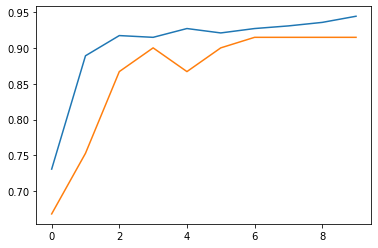

In [23]:
# history of accuracy
plt.plot(cnn_20.history.history['accuracy'], label='train acc')
plt.plot(cnn_20.history.history['val_accuracy'], label='val acc')

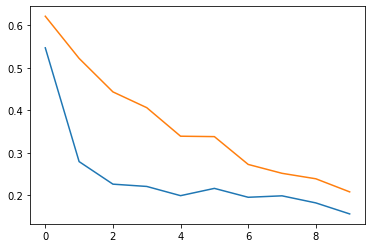

In [28]:
# print accuracy under graph;
plt.plot(cnn_20.history.history['loss'], label='train loss')
plt.plot(cnn_20.history.history['val_loss'], label='val loss') 

In [24]:
# cnn_20.save("imbalanced/CNN_20_layers.h5")

In [25]:
type(cnn_14)

keras.engine.sequential.Sequential